In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('/content/TotalFBREFPlayerData - Sheet1.csv')
df = df.dropna()
df['age'] = df['age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 420
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         390 non-null    object 
 1   age                 390 non-null    float64
 2   position            390 non-null    object 
 3   club_name           390 non-null    object 
 4   club_involved_name  390 non-null    object 
 5   transfer_movement   390 non-null    object 
 6   matches_played      390 non-null    int64  
 7   goals               390 non-null    float64
 8   assists             390 non-null    float64
 9   yellow_card         390 non-null    float64
 10  red_card            390 non-null    float64
 11  90s_played          390 non-null    float64
 12  minutes             390 non-null    object 
 13  xGoals              390 non-null    float64
 14  xAssists            390 non-null    float64
 15  shotsT_90           390 non-null    float64
 16  passes  

In [ ]:
df = df.drop(['player_name'], axis=1)

In [ ]:
df['minutes'] = df['minutes'].str.replace(',', '').astype(float)
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
new_df = df.copy()  
out_rows = df[df['transfer_movement'] == 'out'].index

df_modified = df.copy()

for i in out_rows:
    df_modified.loc[i, ['club_involved_name', 'club_name']] = \
        df.loc[i, ['club_name', 'club_involved_name']].values

df_modified.loc[out_rows, 'transfer_movement'] = "in"

df = df_modified.copy()
df = df.drop('transfer_movement', axis=1)

In [ ]:
Q1 = df["fee_cleaned"].quantile(0.25)
Q3 = df["fee_cleaned"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["fee_cleaned"] < (Q1 - 1.5 * IQR)) | (df["fee_cleaned"] > (Q3 + 1.5 * IQR)))]

df.dropna(subset=["fee_cleaned"], inplace=True)

In [ ]:
position_type = ['Attacker' if position in ['Centre-Forward', 'Second Striker', 'Left Winger',
                                            'Right Winger'] else 'Midfielder' if position in ['Attacking Midfield',
                                                                                              'Central Midfield',
                                                                                              'Right Midfield',
                                                                                              'Defensive Midfield'] else 'Defender' if position in [
    'Centre-Back', 'Right-Back', 'Left-Back'] else 'Goalkeeper' if position == 'Goalkeeper' else None for position in
                 df['position']]

position_idx = df.columns.get_loc('position')

df.insert(position_idx + 1, 'position_type', position_type)

df

,age,position,position_type,club_name,club_involved_name,matches_played,goals,assists,yellow_card,red_card,...,carries,goals_against,goals_against90,Saves,Saves%,PSxG,plus_minus90,season,nationality,fee_cleaned
0,31.0,Left-Back,Defender,Watford FC,AS Roma,37,2.0,0.0,6.0,1.0,...,1588.0,0.0,0.0,0.0,0.0,0.0,0.75,2015/2016,England,2.50
1,28.0,Centre-Back,Defender,Aston Villa,CÃ³rdoba CF,33,1.0,4.0,4.0,0.0,...,1526.0,0.0,0.0,0.0,0.0,0.0,0.99,2015/2016,England,0.80
2,27.0,Centre-Back,Defender,MÃ¡laga CF,Leicester City,25,2.0,3.0,0.0,0.0,...,182.0,0.0,0.0,0.0,0.0,0.0,0.17,2016/2017,England,2.00
3,25.0,Attacking Midfield,Midfielder,Watford FC,Juventus,39,0.0,1.0,2.0,0.0,...,1534.0,0.0,0.0,0.0,0.0,0.0,0.48,2016/2017,England,13.50
4,29.0,Right-Back,Defender,Middlesbrough FC,Valencia,34,5.0,1.0,5.0,0.0,...,85.0,0.0,0.0,0.0,0.0,0.0,0.12,2016/2017,England,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,26.0,Left-Back,Defender,Aston Villa,Newcastle United,38,0.0,2.0,7.0,0.0,...,1151.0,0.0,0.0,0.0,0.0,0.0,0.29,2022/2023,England,17.50
417,31.0,Centre-Back,Defender,Watford FC,West Ham United,24,4.0,0.0,5.0,1.0,...,522.0,0.0,0.0,0.0,0.0,0.0,0.59,2021/2022,England,2.30
418,32.0,Centre-Back,Defender,West Ham United,Wolverhampton Wanderers,50,4.0,2.0,7.0,1.0,...,1281.0,0.0,0.0,0.0,0.0,0.0,0.36,2022/2023,England,3.75
419,29.0,Centre-Forward,Attacker,Southampton FC,Aston Villa,33,13.0,4.0,1.0,0.0,...,459.0,0.0,0.0,0.0,0.0,0.0,-0.29,2021/2022,England,29.42


In [ ]:
copy = df.copy()

le = LabelEncoder()
copy['position'] = le.fit_transform(copy['position'])
copy['position_type'] = le.fit_transform(copy['position_type'])
copy['season'] = le.fit_transform(copy['season'])
copy['nationality'] = le.fit_transform(copy['nationality'])

unique_club_names = pd.concat([copy['club_involved_name'], copy['club_name']]).unique()
le = LabelEncoder()


club_series = le.fit_transform(unique_club_names)
club_mapping = {club_name: i for club_name, i in zip(unique_club_names, club_series)}

copy['club_involved_name'] = copy['club_involved_name'].map(club_mapping)
copy['club_name'] = copy['club_name'].map(club_mapping)
df = copy.copy()
df

,age,position,position_type,club_name,club_involved_name,matches_played,goals,assists,yellow_card,red_card,...,carries,goals_against,goals_against90,Saves,Saves%,PSxG,plus_minus90,season,nationality,fee_cleaned
0,31.0,8,1,161,5,37,2.0,0.0,6.0,1.0,...,1588.0,0.0,0.0,0.0,0.0,0.0,0.75,0,21,2.50
1,28.0,2,1,14,44,33,1.0,4.0,4.0,0.0,...,1526.0,0.0,0.0,0.0,0.0,0.0,0.99,0,21,0.80
2,27.0,2,1,94,81,25,2.0,3.0,0.0,0.0,...,182.0,0.0,0.0,0.0,0.0,0.0,0.17,1,21,2.00
3,25.0,0,3,161,75,39,0.0,1.0,2.0,0.0,...,1534.0,0.0,0.0,0.0,0.0,0.0,0.48,1,21,13.50
4,29.0,11,1,91,154,34,5.0,1.0,5.0,0.0,...,85.0,0.0,0.0,0.0,0.0,0.0,0.12,1,21,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,26.0,8,1,14,96,38,0.0,2.0,7.0,0.0,...,1151.0,0.0,0.0,0.0,0.0,0.0,0.29,7,21,17.50
417,31.0,2,1,161,164,24,4.0,0.0,5.0,1.0,...,522.0,0.0,0.0,0.0,0.0,0.0,0.59,6,21,2.30
418,32.0,2,1,164,166,50,4.0,2.0,7.0,1.0,...,1281.0,0.0,0.0,0.0,0.0,0.0,0.36,7,21,3.75
419,29.0,3,0,135,14,33,13.0,4.0,1.0,0.0,...,459.0,0.0,0.0,0.0,0.0,0.0,-0.29,6,21,29.42


Scaling

In [ ]:
y = df['fee_cleaned']

MinMaxOption

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X_minmax = df.drop('fee_cleaned', axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))

columns_to_scale = ['matches_played', '90s_played', 'minutes', 'goals_against', 'goals_against90', 'Saves', 'PSxG']
X_minmax[columns_to_scale] = scaler.fit_transform(X_minmax[columns_to_scale])

scaler = MinMaxScaler(feature_range=(-1, 1))

X_minmax['plus_minus90'] = scaler.fit_transform(X_minmax[['plus_minus90']])
X_minmax

,age,position,position_type,club_name,club_involved_name,matches_played,goals,assists,yellow_card,red_card,...,touches,carries,goals_against,goals_against90,Saves,Saves%,PSxG,plus_minus90,season,nationality
0,31.0,8,1,161,5,0.679245,2.0,0.0,6.0,1.0,...,2759.0,1588.0,0.0,0.0,0.0,0.0,0.0,-0.566814,0,21
1,28.0,2,1,14,44,0.603774,1.0,4.0,4.0,0.0,...,2532.0,1526.0,0.0,0.0,0.0,0.0,0.0,-0.536415,0,21
2,27.0,2,1,94,81,0.452830,2.0,3.0,0.0,0.0,...,293.0,182.0,0.0,0.0,0.0,0.0,0.0,-0.640279,1,21
3,25.0,0,3,161,75,0.716981,0.0,1.0,2.0,0.0,...,2377.0,1534.0,0.0,0.0,0.0,0.0,0.0,-0.601013,1,21
4,29.0,11,1,91,154,0.622642,5.0,1.0,5.0,0.0,...,175.0,85.0,0.0,0.0,0.0,0.0,0.0,-0.646612,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,26.0,8,1,14,96,0.698113,0.0,2.0,7.0,0.0,...,2534.0,1151.0,0.0,0.0,0.0,0.0,0.0,-0.625079,7,21
417,31.0,2,1,161,164,0.433962,4.0,0.0,5.0,1.0,...,961.0,522.0,0.0,0.0,0.0,0.0,0.0,-0.587080,6,21
418,32.0,2,1,164,166,0.924528,4.0,2.0,7.0,1.0,...,2161.0,1281.0,0.0,0.0,0.0,0.0,0.0,-0.616213,7,21
419,29.0,3,0,135,14,0.603774,13.0,4.0,1.0,0.0,...,817.0,459.0,0.0,0.0,0.0,0.0,0.0,-0.698543,6,21


In [ ]:
(pd.concat([X_minmax, y], axis=1)).to_csv('MinMaxData.csv')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


X_minmax = df.drop('fee_cleaned', axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))

columns_to_scale = ['matches_played', '90s_played', 'minutes', 'goals_against', 'goals_against90', 'Saves', 'PSxG']
X_minmax[columns_to_scale] = scaler.fit_transform(X_minmax[columns_to_scale])

scaler = MinMaxScaler(feature_range=(-1, 1))
X_minmax['plus_minus90'] = scaler.fit_transform(X_minmax[['plus_minus90']])

selector = SelectKBest(score_func=f_regression, k=20)
X_kbest = selector.fit_transform(X_minmax, df['fee_cleaned'])

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_minmax.columns[selected_feature_indices]
X_minmax = X_minmax[selected_feature_names]


print("Selected k-best feature names:", selected_feature_names)
X_minmax

In [ ]:
(pd.concat([X_minmax, y], axis=1)).to_csv('MinMaxData.csv')

StandardOption

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

X_standard = df.drop('fee_cleaned', axis=1)


scaler = StandardScaler()

columns_to_scale = ['matches_played', '90s_played', 'minutes', 'goals_against', 'goals_against90', 'Saves', 'PSxG', 'plus_minus90']
X_standard[columns_to_scale] = scaler.fit_transform(X_standard[columns_to_scale])

selector = SelectKBest(score_func=f_regression, k=20)
X_kbest = selector.fit_transform(X_standard, df['fee_cleaned'])
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_standard.columns[selected_feature_indices]
X_standard = X_standard[selected_feature_names]
X_standard

,age,matches_played,goals,assists,yellow_card,90s_played,minutes,xGoals,xAssists,shotsT_90,passes,pass_complete%,tackle,block,touches,carries,goals_against90,Saves,Saves%,plus_minus90
0,31.0,0.628287,2.0,0.0,6.0,0.582985,0.780545,1.1,2.6,0.09,2120.0,86.8,76.0,25.0,2759.0,1588.0,-0.193994,-0.170757,0.0,0.405491
1,28.0,0.288245,1.0,4.0,4.0,0.386883,0.506511,0.9,2.6,0.20,1972.0,87.4,85.0,24.0,2532.0,1526.0,-0.193994,-0.170757,0.0,0.629830
2,27.0,-0.391837,2.0,3.0,0.0,-0.855099,-1.010361,0.8,0.5,0.67,163.0,74.4,7.0,7.0,293.0,182.0,-0.193994,-0.170757,0.0,-0.136662
3,25.0,0.798307,0.0,1.0,2.0,0.844455,1.096099,1.4,0.4,0.11,1790.0,86.8,50.0,41.0,2377.0,1534.0,-0.193994,-0.170757,0.0,0.153109
4,29.0,0.373256,5.0,1.0,5.0,0.125413,0.163278,0.4,0.8,0.58,114.0,81.4,3.0,5.0,175.0,85.0,-0.193994,-0.170757,0.0,-0.183399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,26.0,0.713297,0.0,2.0,7.0,0.909822,1.143155,0.3,2.5,0.05,2189.0,75.2,56.0,40.0,2534.0,1151.0,-0.193994,-0.170757,0.0,-0.024492
417,31.0,-0.476848,4.0,0.0,5.0,-0.024933,-0.027715,1.9,0.1,0.25,767.0,79.7,11.0,26.0,961.0,522.0,-0.193994,-0.170757,0.0,0.255931
418,32.0,1.733421,4.0,2.0,7.0,1.504666,1.913586,4.8,1.2,0.23,1762.0,82.4,33.0,75.0,2161.0,1281.0,-0.193994,-0.170757,0.0,0.040940
419,29.0,0.288245,13.0,4.0,1.0,0.256148,0.326591,8.5,2.1,1.00,527.0,63.9,22.0,39.0,817.0,459.0,-0.193994,-0.170757,0.0,-0.566645


In [ ]:
(pd.concat([X_standard, y], axis=1)).to_csv('StandardData.csv')

Decision Tree Model

In [ ]:
X = df.drop(['fee_cleaned'], axis=1)
y = df['fee_cleaned']

In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
tree_reg = DecisionTreeRegressor()

In [ ]:
depths = [1,2,3,4]
scores1=[]
scores1_train=[]

for depth in depths:
  tree_reg = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  r2_list= []
  r2_train_list=[]
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    tree_reg.fit(X_train,y_train)
    predictions = tree_reg.predict(X_test)
    r2_train = r2_score(tree_reg.predict(X_train),y_train)
    r2 = r2_score(predictions,y_test)
    r2_train_list.append(r2_train)
    r2_list.append(r2)

  scores1_train.append(np.mean(r2_train_list))
  scores1.append(np.mean(r2_list))
print(scores1)
print(scores1_train)

max_index = np.argmax(np.array(scores1))
best_depth = depths[max_index]
print("R2 = {}, Depth = {}".format(max(scores1),best_depth))

[-14.09676911436082, -3.725653273620625, -2.850915588582296, -1.3555212097044709]
[-6.533073400632219, -2.3269078144187576, -1.0053712974448914, -0.2265489712626599]
R2 = -1.3555212097044709, Depth = 4


In [ ]:
depths = [1,2,3,4,None]
scores=[]
scores_train=[]

for depth in depths:
  tree_reg = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  mse_list= []
  mse_train_list=[]
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    tree_reg.fit(X_train,y_train)
    predictions = tree_reg.predict(X_test)
    mse_train = mean_squared_error(tree_reg.predict(X_train),y_train)
    mse = mean_squared_error(predictions,y_test)
    mse_train_list.append(mse_train)
    mse_list.append(mse)

  scores_train.append(np.mean(mse_train_list))
  scores.append(np.mean(mse_list))
print(scores)
print(scores_train)

min_index = np.argmin(np.array(scores))
best_depth = depths[min_index]
print("MSE = {}, Depth = {}".format(min(scores),best_depth))

[143.9867843058333, 132.05028673847207, 136.47233881769876, 159.90576933520077, 213.88703318137726]
[126.39111147465776, 110.34462204400549, 95.66585540092859, 78.48768488389742, 0.0]
MSE = 132.05028673847207, Depth = 2


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=1)

In [ ]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
regModel = DecisionTreeRegressor(max_depth=3, random_state=42)
regModel.fit(X_train, y_train)
predictions = regModel.predict(X_test)
train_predictions = regModel.predict(X_train)

In [ ]:
mse = mean_squared_error(predictions, y_test)
mse_train = mean_squared_error(train_predictions, y_train)

[Text(0.5, 0.875, 'xAssists <= 1.85\nsquared_error = 144.163\nsamples = 293\nvalue = 15.508'),
 Text(0.25, 0.625, 'pass_complete% <= 80.1\nsquared_error = 92.161\nsamples = 192\nvalue = 12.177'),
 Text(0.125, 0.375, 'assists <= 3.5\nsquared_error = 69.162\nsamples = 116\nvalue = 9.849'),
 Text(0.0625, 0.125, 'squared_error = 53.273\nsamples = 105\nvalue = 8.801'),
 Text(0.1875, 0.125, 'squared_error = 110.321\nsamples = 11\nvalue = 19.85'),
 Text(0.375, 0.375, 'xGoals <= 0.75\nsquared_error = 106.369\nsamples = 76\nvalue = 15.73'),
 Text(0.3125, 0.125, 'squared_error = 51.517\nsamples = 35\nvalue = 11.869'),
 Text(0.4375, 0.125, 'squared_error = 129.606\nsamples = 41\nvalue = 19.026'),
 Text(0.75, 0.625, 'shotsT_90 <= 0.885\nsquared_error = 181.809\nsamples = 101\nvalue = 21.841'),
 Text(0.625, 0.375, 'plus_minus90 <= 0.66\nsquared_error = 146.447\nsamples = 73\nvalue = 18.186'),
 Text(0.5625, 0.125, 'squared_error = 100.303\nsamples = 53\nvalue = 15.443'),
 Text(0.6875, 0.125, 'square

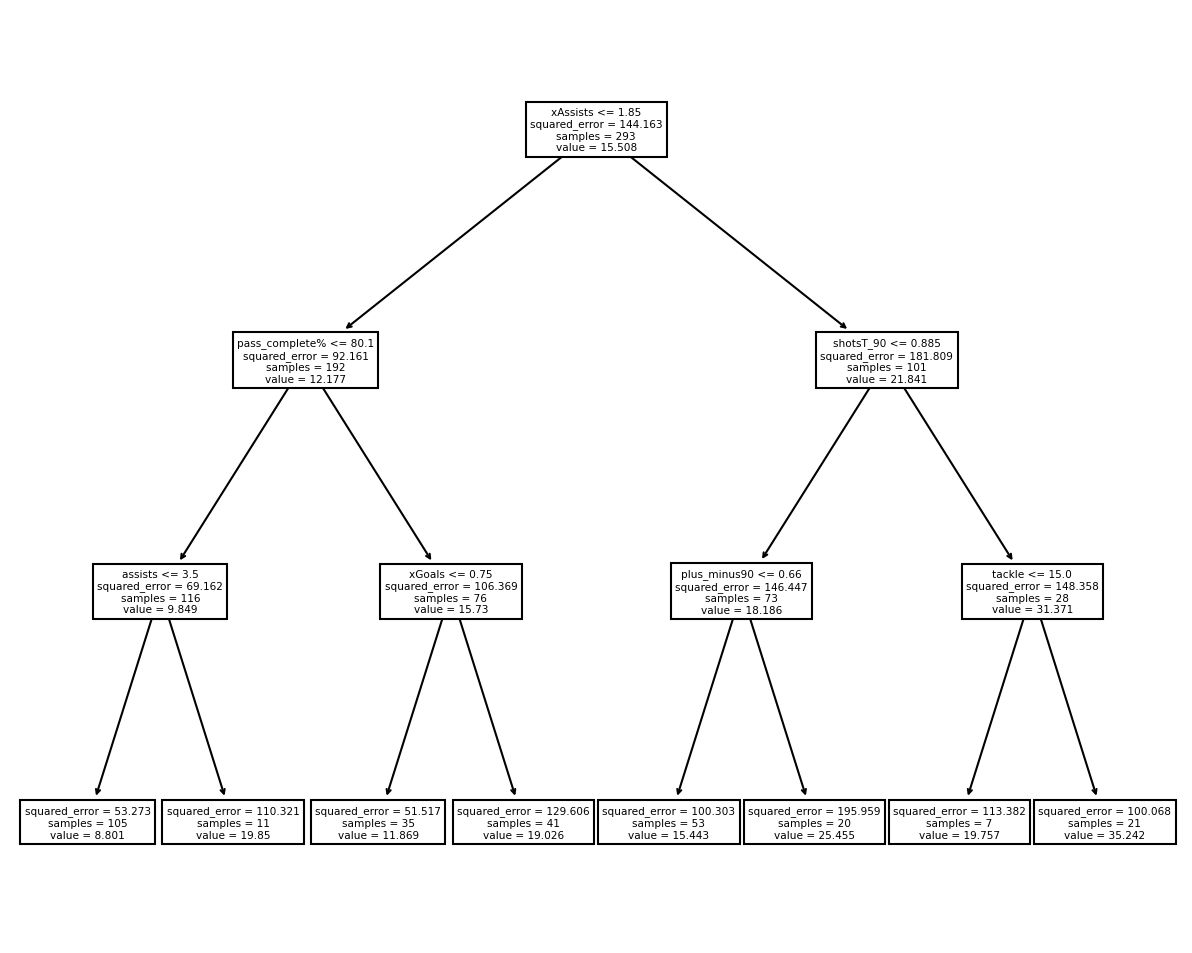

In [ ]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(regModel, feature_names=X.columns)